In [ ]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты
import seaborn as sns
from sklearn.cluster import KMeans

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка таблиц

In [45]:
data_2018 = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2018.xlsx")

In [ ]:
data_2019 = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2019.xlsx")

In [ ]:
data_2020 = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2020.xlsx")

In [ ]:
data_2021 = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2021.xlsx")

In [ ]:
data_2022 = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2022.xlsx")

In [ ]:
#companies = pd.read_excel("/content/drive/MyDrive/ИПС/Данные/Итог.xlsx")

In [ ]:
altman_components = pd.read_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман со значениями.xlsx")
altman_components

,x1_2018,x2_2018,x3_2018,x4_2018,x5_2018,result_2018,x1_2019,x2_2019,x3_2019,x4_2019,...,x4_2021,x5_2021,result_2021,x1_2022,x2_2022,x3_2022,x4_2022,x5_2022,result_2022,index_column
0,0.133850,0.150271,0.123488,0.080846,31.083555,58.922429,0.027420,0.182458,0.021044,0.002824,...,0.050461,12.000227,55.904617,0.059410,0.140509,0.054547,0.011106,11.813744,52.774879,13331
1,0.047290,0.414882,0.040481,0.000450,7.399180,44.614250,0.036657,0.107456,0.031845,0.016594,...,0.133007,41.255275,60.791539,0.007835,0.244177,0.005419,0.026538,3.242441,50.768529,13949
2,0.024322,0.219454,0.010930,0.004107,2.935829,47.353019,0.019058,0.058766,0.013083,0.001621,...,0.110121,17.954390,68.484533,0.064928,0.050712,0.051831,0.203902,11406.000000,72.831946,32834
3,0.036976,0.337814,0.023916,0.016923,18.616438,53.220150,0.139234,0.288295,0.107279,0.047946,...,0.021798,26.881232,57.893316,0.144325,0.149579,0.105570,0.019036,18.229779,55.177473,37717
4,0.023767,0.327202,0.008214,0.004046,1.605941,45.671297,0.022891,0.306532,0.007622,0.005307,...,0.006680,6.228365,49.863683,0.045723,0.284123,0.014409,0.016640,1.532235,48.460330,50821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.367653,0.115660,0.284339,0.111694,78.290093,63.797393,0.540333,0.146351,0.425280,0.247475,...,0.063550,231.262643,66.813643,0.376958,0.269683,0.291467,0.025774,29.578130,58.328972,160765
880,0.828813,0.737330,0.661423,0.224279,5077.734375,79.791288,0.560325,0.384241,0.444208,0.386879,...,0.194862,320.935331,67.461354,0.314990,0.096536,0.294708,0.471787,100.631076,66.883204,160857
881,0.304150,0.263262,0.231879,0.006651,14.259309,53.624692,0.241896,0.180735,0.178173,0.372994,...,0.095622,18.302898,57.756966,0.166632,0.105087,0.144167,0.261569,29.288004,61.630973,160876
882,0.149250,0.136189,0.074084,0.017812,2.697385,51.270749,0.098264,0.241705,0.044703,0.003287,...,0.005554,2.276515,47.475400,0.179121,0.117589,0.103079,0.023426,4.185545,53.090284,160890


In [ ]:
data_2018['result_2018'].quantile(0.95)

65.3327519068148

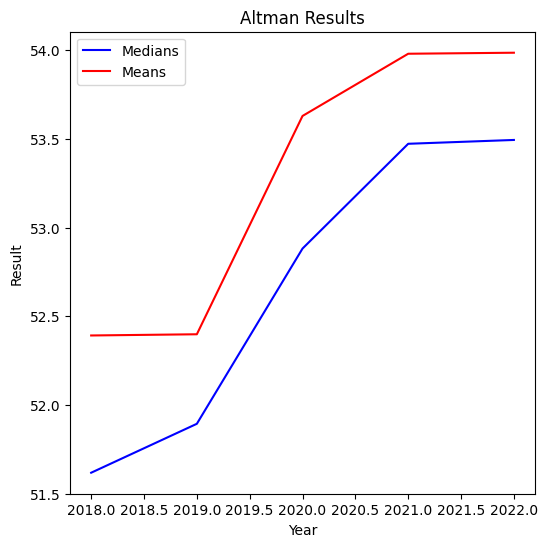

In [ ]:
medians = [data_2018['result_2018'].quantile(0.5), data_2019['result_2019'].quantile(0.5), data_2020['result_2020'].quantile(0.5), data_2021['result_2021'].quantile(0.5), data_2022['result_2022'].quantile(0.5)]
means = [data_2018['result_2018'].mean(), data_2019['result_2019'].mean(), data_2020['result_2020'].mean(), data_2021['result_2021'].mean(), data_2022['result_2022'].mean()]
years = [2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(6, 6))
plt.plot(years, medians, label='Medians', color='blue')
plt.plot(years, means, label='Means', color='red')
plt.xlabel('Year')
plt.ylabel('Result')
plt.title('Altman Results')
plt.legend()
plt.show()



# Немного визуализаций

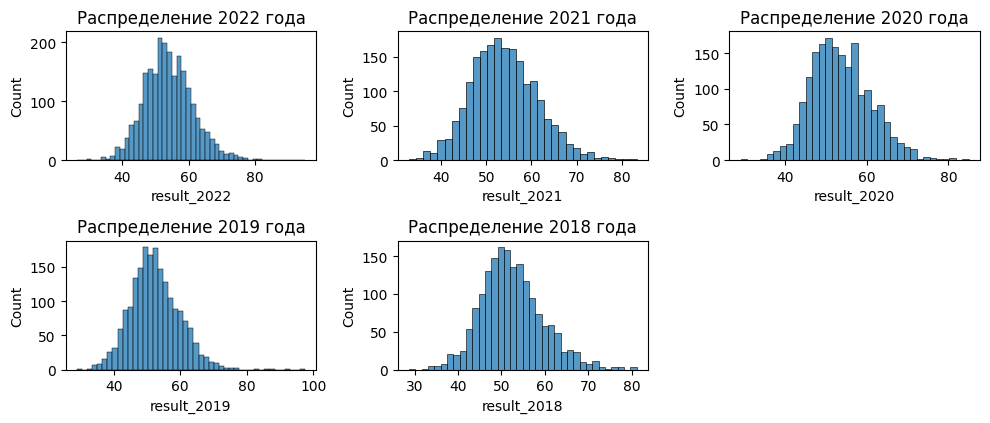

In [ ]:

plt.figure(figsize=(10, 6))

plt.subplot(3, 3, 1)
sns.histplot(data_2022['result_2022'])
plt.title('Распределение 2022 года')

plt.subplot(3, 3, 2)
sns.histplot(data_2021['result_2021'])
plt.title('Распределение 2021 года')

plt.subplot(3, 3, 3)
sns.histplot(data_2020['result_2020'])
plt.title('Распределение 2020 года')

plt.subplot(3, 3, 4)
sns.histplot(data_2019['result_2019'])
plt.title('Распределение 2019 года')

plt.subplot(3, 3, 5)
sns.histplot(data_2018['result_2018'])
plt.title('Распределение 2018 года')

plt.tight_layout()
plt.show()

<Axes: ylabel='result_2022'>

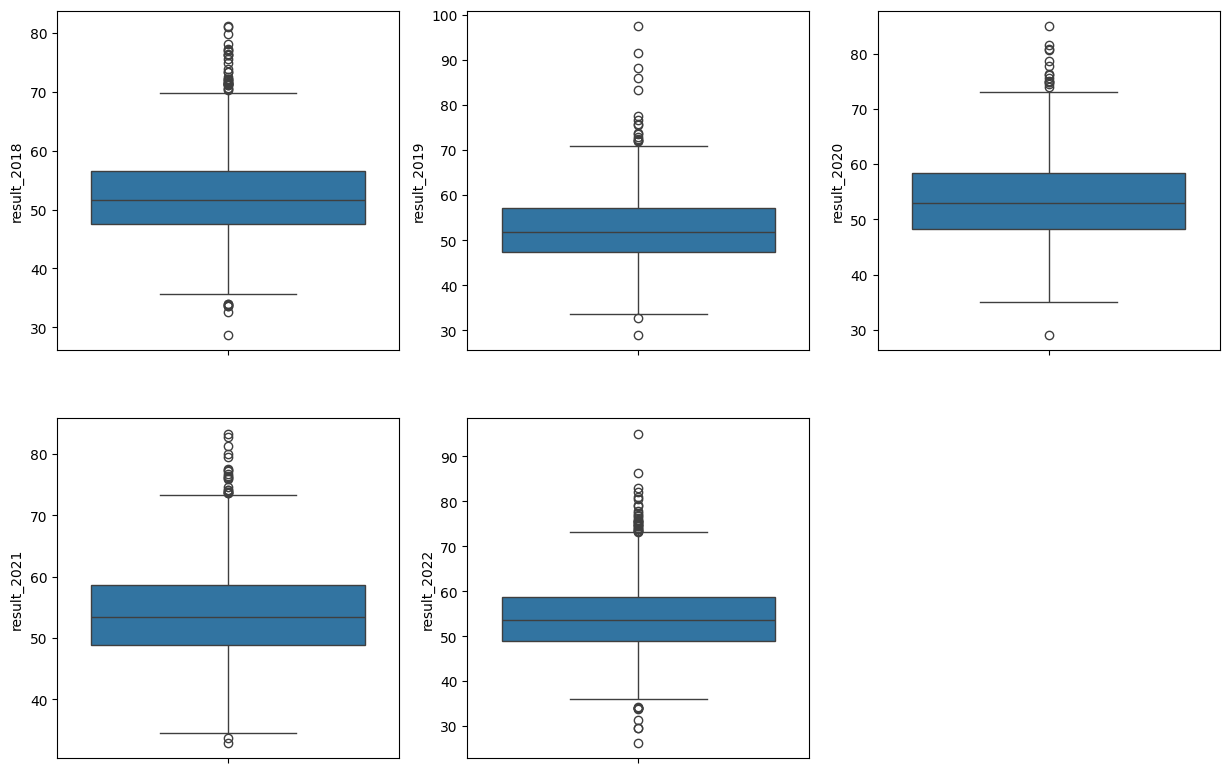

In [ ]:
plt.figure(figsize = (15, 15))

plt.subplot(3, 3, 1)
sns.boxplot(data_2018['result_2018'])

plt.subplot(3, 3, 2)
sns.boxplot(data_2019['result_2019'])

plt.subplot(3, 3, 3)
sns.boxplot(data_2020['result_2020'])

plt.subplot(3, 3, 4)
sns.boxplot(data_2021['result_2021'])

plt.subplot(3, 3, 5)
sns.boxplot(data_2022['result_2022'])

# Кластеризация. Панельные данные

In [ ]:
features = altman_components[['result_2018', 'result_2019', 'result_2020', 'result_2021', 'result_2022']]

clustering = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(features)

clustering.cluster_centers_

array([[45.90331746, 45.27307942, 46.6354522 , 46.60773355, 46.96029872],
       [58.62967246, 58.97589112, 61.39572142, 61.49872228, 60.0186533 ],
       [51.57388823, 51.64866832, 52.55457036, 53.55980957, 53.43343409]])

In [ ]:
altman_components['cluster_number'] = clustering.labels_
altman_components

,x1_2018,x2_2018,x3_2018,x4_2018,x5_2018,result_2018,x1_2019,x2_2019,x3_2019,x4_2019,...,x5_2021,result_2021,x1_2022,x2_2022,x3_2022,x4_2022,x5_2022,result_2022,index_column,cluster_number
0,0.133850,0.150271,0.123488,0.080846,31.083555,58.922429,0.027420,0.182458,0.021044,0.002824,...,12.000227,55.904617,0.059410,0.140509,0.054547,0.011106,11.813744,52.774879,13331,2
1,0.047290,0.414882,0.040481,0.000450,7.399180,44.614250,0.036657,0.107456,0.031845,0.016594,...,41.255275,60.791539,0.007835,0.244177,0.005419,0.026538,3.242441,50.768529,13949,2
2,0.024322,0.219454,0.010930,0.004107,2.935829,47.353019,0.019058,0.058766,0.013083,0.001621,...,17.954390,68.484533,0.064928,0.050712,0.051831,0.203902,11406.000000,72.831946,32834,1
3,0.036976,0.337814,0.023916,0.016923,18.616438,53.220150,0.139234,0.288295,0.107279,0.047946,...,26.881232,57.893316,0.144325,0.149579,0.105570,0.019036,18.229779,55.177473,37717,2
4,0.023767,0.327202,0.008214,0.004046,1.605941,45.671297,0.022891,0.306532,0.007622,0.005307,...,6.228365,49.863683,0.045723,0.284123,0.014409,0.016640,1.532235,48.460330,50821,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.367653,0.115660,0.284339,0.111694,78.290093,63.797393,0.540333,0.146351,0.425280,0.247475,...,231.262643,66.813643,0.376958,0.269683,0.291467,0.025774,29.578130,58.328972,160765,1
880,0.828813,0.737330,0.661423,0.224279,5077.734375,79.791288,0.560325,0.384241,0.444208,0.386879,...,320.935331,67.461354,0.314990,0.096536,0.294708,0.471787,100.631076,66.883204,160857,1
881,0.304150,0.263262,0.231879,0.006651,14.259309,53.624692,0.241896,0.180735,0.178173,0.372994,...,18.302898,57.756966,0.166632,0.105087,0.144167,0.261569,29.288004,61.630973,160876,1
882,0.149250,0.136189,0.074084,0.017812,2.697385,51.270749,0.098264,0.241705,0.044703,0.003287,...,2.276515,47.475400,0.179121,0.117589,0.103079,0.023426,4.185545,53.090284,160890,2


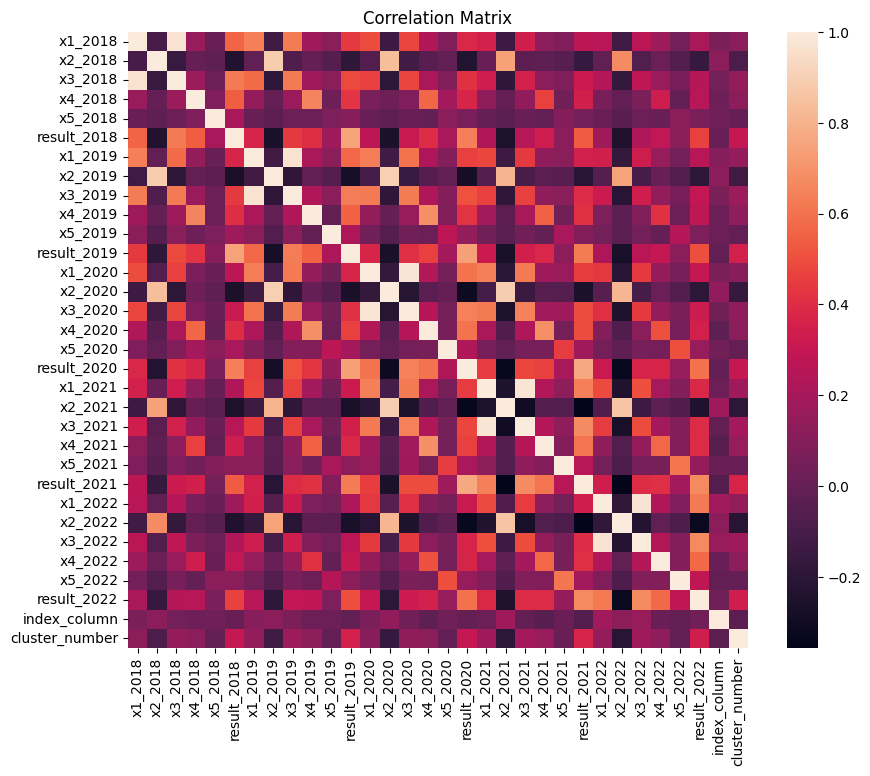

In [ ]:
correlation_matrix = altman_components.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=None, vmax=None, cmap=None,center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.title('Correlation Matrix')
plt.show()

На результат итогового коэффициента Альтмана почти не влияет компонент x2, далее чуть больше корреляция с компонентом x5, остальные вносят значительный вклад в коэффициент Альтмана

In [ ]:
cluster_counts = altman_components['cluster_number'].value_counts()
print(cluster_counts)

cluster_number
2    397
0    272
1    215
Name: count, dtype: int64


кластеризуем по каждому году и проследим, происходил ли переход

In [ ]:
clustering18 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components['result_2018'].values.reshape(-1, 1))


clustering19 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components['result_2019'].values.reshape(-1, 1))


clustering20 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components['result_2020'].values.reshape(-1, 1))


clustering21 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components['result_2021'].values.reshape(-1, 1))


clustering22 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components['result_2022'].values.reshape(-1, 1))


In [ ]:
clustered_data = pd.DataFrame()

cluster_mapping = {0: 0, 1: 1, 2: 2}

for year in range(2018, 2023):
    clustered_data[f'result_{year}'] = altman_components[f'result_{year}']
    clustering = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(altman_components[f'result_{year}'].values.reshape(-1, 1))
    centroids = clustering.cluster_centers_.flatten()
    sorted_clusters = [x for _, x in sorted(zip(centroids, range(3)))]
    cluster_mapping = {0: 0, 1: 1, 2: 2}
    clustered_data[f'cluster_number{year}'] = [cluster_mapping[sorted_clusters[cluster]] for cluster in clustering.labels_]

clustered_data

,result_2018,cluster_number2018,result_2019,cluster_number2019,result_2020,cluster_number2020,result_2021,cluster_number2021,result_2022,cluster_number2022
0,58.922429,0,47.685828,0,55.214886,1,55.904617,1,52.774879,1
1,44.614250,1,54.174316,1,64.024629,2,60.791539,2,50.768529,1
2,47.353019,1,49.195999,1,58.103880,1,68.484533,2,72.831946,2
3,53.220150,2,60.186697,2,48.937079,0,57.893316,1,55.177473,1
4,45.671297,1,46.195950,0,49.748755,0,49.863683,0,48.460330,0
...,...,...,...,...,...,...,...,...,...,...
879,63.797393,0,68.094486,2,70.055701,2,66.813643,2,58.328972,2
880,79.791288,0,69.625473,2,67.195448,2,67.461354,2,66.883204,2
881,53.624692,2,60.979591,2,63.425532,2,57.756966,1,61.630973,2
882,51.270749,2,46.680497,0,51.303424,1,47.475400,0,53.090284,1


матрица миграций 18-19

In [ ]:
migration_matrix18 = np.zeros((3, 3))

for year in range(2018, 2019):
    current_clusters = clustered_data[f'cluster_number{year}']
    next_clusters = clustered_data[f'cluster_number{year+1}']

    for i in range(len(current_clusters)):
        migration_matrix18[current_clusters[i], next_clusters[i]] += 1


print("Migration Matrix 2018:")
migration_matrix18

Migration Matrix 2018:


array([[  5.,  53., 117.],
       [187.,  83.,   3.],
       [ 89., 276.,  71.]])

In [ ]:
migration_matrix18_probs = [[] for _ in range(3)]
for i in range(3):
  a = sum(migration_matrix18[i])
  migration_matrix18_probs[i] = [el/a for el in migration_matrix18[i]]

migration_matrix18_probs

[[0.02857142857142857, 0.3028571428571429, 0.6685714285714286],
 [0.684981684981685, 0.304029304029304, 0.01098901098901099],
 [0.20412844036697247, 0.6330275229357798, 0.1628440366972477]]

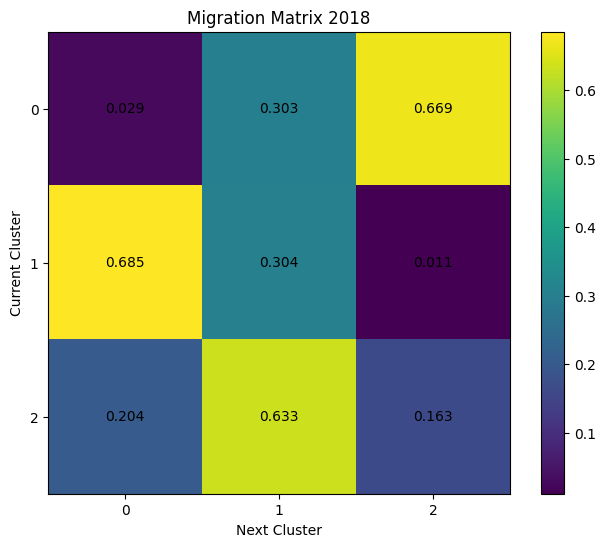

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(migration_matrix18_probs, cmap='viridis', interpolation='nearest')

plt.title('Migration Matrix 2018')
plt.colorbar()
plt.xlabel('Next Cluster')
plt.ylabel('Current Cluster')
plt.xticks(np.arange(3))
plt.yticks(np.arange(3))

for i in range(3):
    for j in range(3):
        plt.text(j, i, '{:.3f}'.format(migration_matrix18_probs[i][j]), ha='center', va='center', color='black')

plt.show()

In [ ]:
migration_matrix19 = np.zeros((3, 3))

for year in range(2019, 2020):
    current_clusters = clustered_data[f'cluster_number{year}']
    next_clusters = clustered_data[f'cluster_number{year+1}']

    for i in range(len(current_clusters)):
        migration_matrix19[current_clusters[i], next_clusters[i]] += 1


print("Migration Matrix 2019:")
migration_matrix19

Migration Matrix 2019:


array([[212.,  66.,   3.],
       [129., 241.,  42.],
       [ 13.,  71., 107.]])

In [ ]:
migration_matrix19_probs = [[] for _ in range(3)]
for i in range(3):
  a = sum(migration_matrix19[i])
  migration_matrix19_probs[i] = [el/a for el in migration_matrix19[i]]

migration_matrix19_probs

[[0.7544483985765125, 0.23487544483985764, 0.010676156583629894],
 [0.3131067961165049, 0.5849514563106796, 0.10194174757281553],
 [0.06806282722513089, 0.3717277486910995, 0.5602094240837696]]

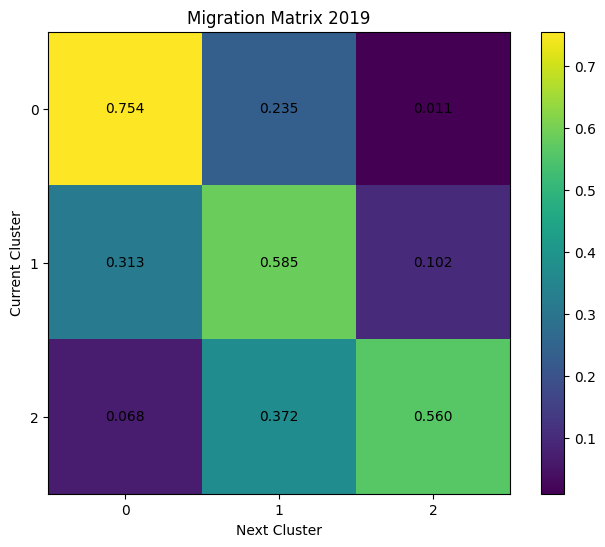

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(migration_matrix19_probs, cmap='viridis', interpolation='nearest')

plt.title('Migration Matrix 2019')
plt.colorbar()
plt.xlabel('Next Cluster')
plt.ylabel('Current Cluster')
plt.xticks(np.arange(3))
plt.yticks(np.arange(3))

for i in range(3):
    for j in range(3):
        plt.text(j, i, '{:.3f}'.format(migration_matrix19_probs[i][j]), ha='center', va='center', color='black')

plt.show()

In [ ]:
migration_matrix20 = np.zeros((3, 3))

for year in range(2020, 2021):
    current_clusters = clustered_data[f'cluster_number{year}']
    next_clusters = clustered_data[f'cluster_number{year+1}']

    for i in range(len(current_clusters)):
        migration_matrix20[current_clusters[i], next_clusters[i]] += 1


print("Migration Matrix 2020:")
migration_matrix20

Migration Matrix 2020:


array([[240., 107.,   7.],
       [ 64., 248.,  66.],
       [  5.,  39., 108.]])

In [ ]:
migration_matrix20_probs = [[] for _ in range(3)]
for i in range(3):
  a = sum(migration_matrix20[i])
  migration_matrix20_probs[i] = [el/a for el in migration_matrix20[i]]

migration_matrix20_probs

[[0.6779661016949152, 0.3022598870056497, 0.01977401129943503],
 [0.1693121693121693, 0.656084656084656, 0.1746031746031746],
 [0.03289473684210526, 0.2565789473684211, 0.7105263157894737]]

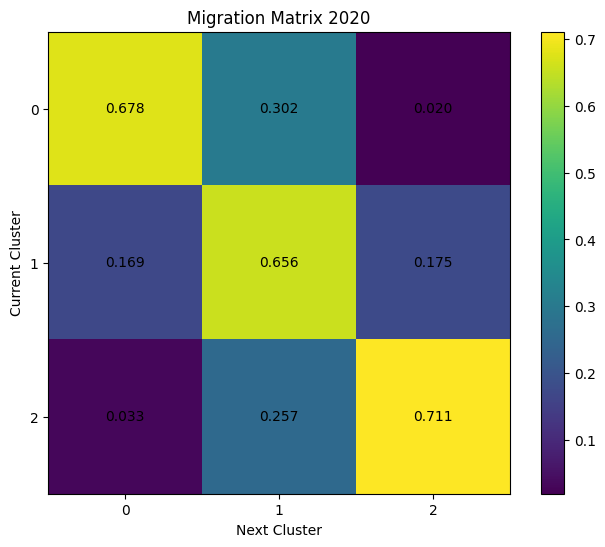

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(migration_matrix20_probs, cmap='viridis', interpolation='nearest')

plt.title('Migration Matrix 2020')
plt.colorbar()
plt.xlabel('Next Cluster')
plt.ylabel('Current Cluster')
plt.xticks(np.arange(3))
plt.yticks(np.arange(3))

for i in range(3):
    for j in range(3):
        plt.text(j, i, '{:.3f}'.format(migration_matrix20_probs[i][j]), ha='center', va='center', color='black')

plt.show()

In [ ]:
migration_matrix21 = np.zeros((3, 3))

for year in range(2021, 2022):
    current_clusters = clustered_data[f'cluster_number{year}']
    next_clusters = clustered_data[f'cluster_number{year+1}']

    for i in range(len(current_clusters)):
        migration_matrix21[current_clusters[i], next_clusters[i]] += 1


print("Migration Matrix 2022:")
migration_matrix21

Migration Matrix 2022:


array([[188., 113.,   8.],
       [ 67., 258.,  69.],
       [ 15.,  48., 118.]])

In [ ]:
migration_matrix21_probs = [[] for _ in range(3)]
for i in range(3):
  a = sum(migration_matrix21[i])
  migration_matrix21_probs[i] = [el/a for el in migration_matrix21[i]]

migration_matrix21_probs

[[0.6084142394822006, 0.3656957928802589, 0.025889967637540454],
 [0.1700507614213198, 0.6548223350253807, 0.1751269035532995],
 [0.08287292817679558, 0.26519337016574585, 0.6519337016574586]]

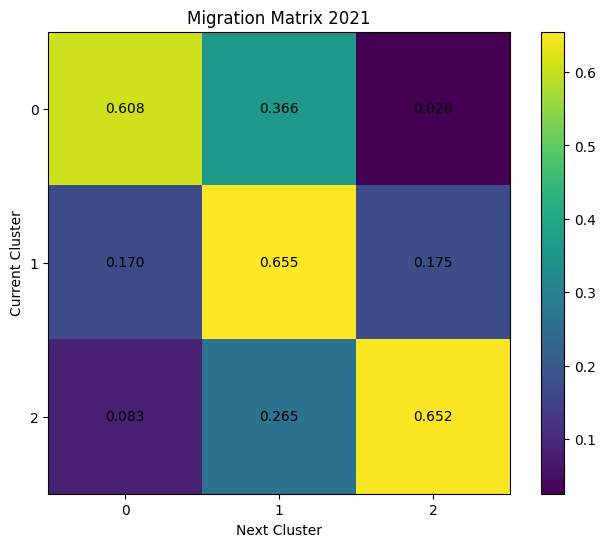

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(migration_matrix21_probs, cmap='viridis', interpolation='nearest')

plt.title('Migration Matrix 2021')
plt.colorbar()
plt.xlabel('Next Cluster')
plt.ylabel('Current Cluster')
plt.xticks(np.arange(3))
plt.yticks(np.arange(3))

for i in range(3):
    for j in range(3):
        plt.text(j, i, '{:.3f}'.format(migration_matrix21_probs[i][j]), ha='center', va='center', color='black')

plt.show()

In [ ]:
def markov_process(transition_matrix, current_state, num_steps):
    states = [current_state]

    for _ in range(num_steps):
        next_state = np.random.choice(range(len(transition_matrix)), p=transition_matrix[current_state])
        states.append(next_state)
        current_state = next_state

    return states

In [ ]:
transition_matrix = migration_matrix21_probs
current_state = 1
num_steps = 1000

result = markov_process(transition_matrix, current_state, num_steps)
print(result[-1])

0


In [ ]:
i = np.eye(3)
res = i @ np.array(migration_matrix18_probs).T
res = res @ np.array(migration_matrix19_probs).T @ np.array(migration_matrix20_probs).T @ np.array(migration_matrix21_probs).T
res

array([[0.30800106, 0.35901773, 0.36989707],
       [0.33692634, 0.36669247, 0.41067221],
       [0.3550726 , 0.27428981, 0.21943071]])

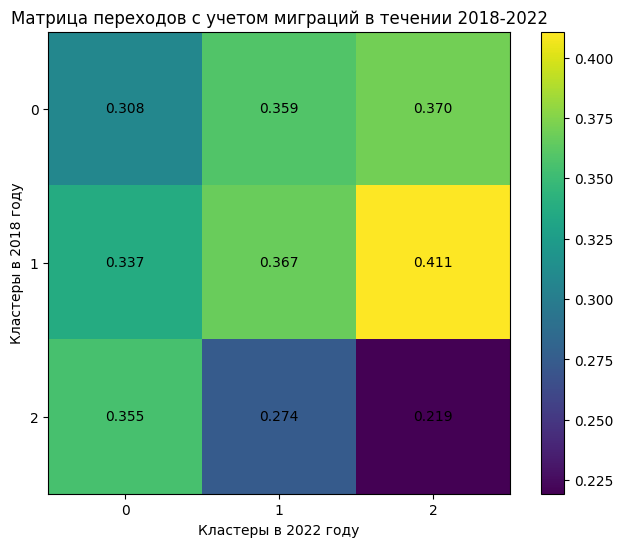

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(res, cmap='viridis', interpolation='nearest')

plt.title('Матрица переходов с учетом миграций в течении 2018-2022')
plt.colorbar()
plt.xlabel('Кластеры в 2022 году')
plt.ylabel('Кластеры в 2018 году')
plt.xticks(np.arange(3))
plt.yticks(np.arange(3))

for i in range(3):
    for j in range(3):
        plt.text(j, i, '{:.3f}'.format(res[i][j]), ha='center', va='center', color='black')

plt.show()

Вероятность, что:
 - компании первого типа остаются в первом кластере = 0.24864727
 - компании второго типа остаются в втором кластере = 0.37307051
 - компании третьего типа остаются в третьем кластере = 0.3052985

 Вывод: наиболее стабильными получились комапании среднего кластера

In [ ]:
migration_matrix1822 = np.zeros((3, 3))

for year in range(1):
    current_clusters = clustered_data[f'cluster_number2018']
    next_clusters = clustered_data[f'cluster_number2022']

    for i in range(len(current_clusters)):
        migration_matrix1822[current_clusters[i], next_clusters[i]] += 1


print("Migration Matrix 2018-2022:")
migration_matrix1822

Migration Matrix 2018-2022:


array([[ 24.,  72.,  79.],
       [142., 110.,  21.],
       [104., 237.,  95.]])

In [ ]:
migration_matrix1822_probs = [[] for _ in range(3)]
for i in range(3):
  a = sum(migration_matrix1822[i])
  migration_matrix1822_probs[i] = [el/a for el in migration_matrix1822[i]]

migration_matrix1822_probs

[[0.13714285714285715, 0.4114285714285714, 0.4514285714285714],
 [0.5201465201465202, 0.40293040293040294, 0.07692307692307693],
 [0.23853211009174313, 0.5435779816513762, 0.21788990825688073]]

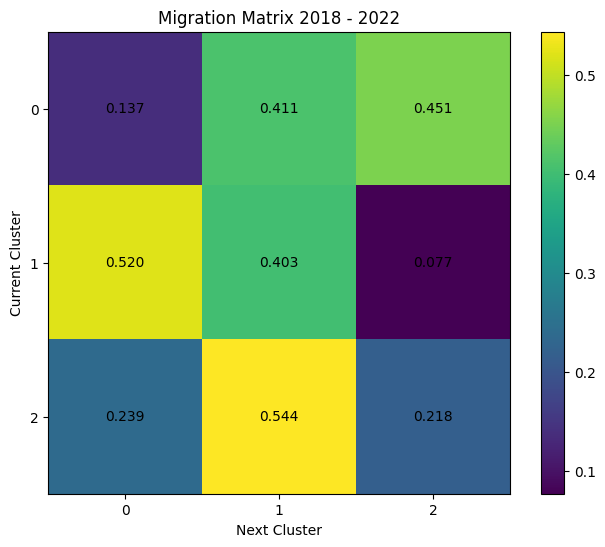

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(migration_matrix1822_probs, cmap='viridis', interpolation='nearest')

plt.title('Migration Matrix 2018 - 2022')
plt.colorbar()
plt.xlabel('Next Cluster')
plt.ylabel('Current Cluster')
plt.xticks(np.arange(3))
plt.yticks(np.arange(3))

for i in range(3):
    for j in range(3):
        plt.text(j, i, '{:.3f}'.format(migration_matrix1822_probs[i][j]), ha='center', va='center', color='black')

plt.show()

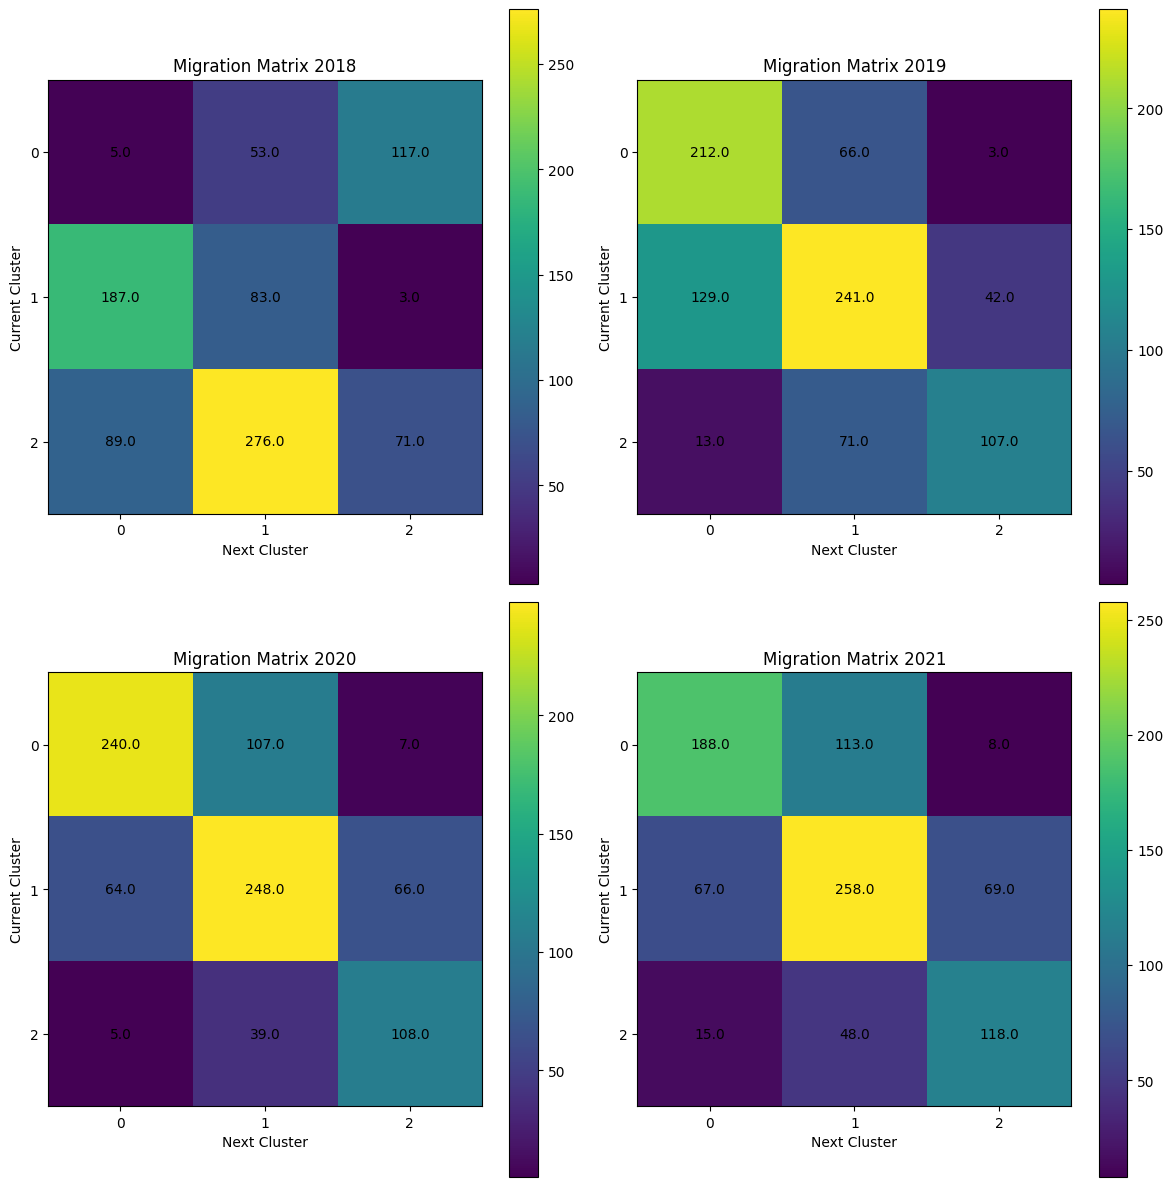

In [ ]:
plt.figure(figsize=(12, 12))
migration_matrices = []
migration_matrices = [migration_matrix18,migration_matrix19, migration_matrix20, migration_matrix21]

for i, matrix in enumerate(migration_matrices):
    plt.subplot(2, 2, i+1)
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.title(f'Migration Matrix {2018 + i}')
    plt.colorbar()
    plt.xlabel('Next Cluster')
    plt.ylabel('Current Cluster')
    plt.xticks(np.arange(3))
    plt.yticks(np.arange(3))

    for x in range(3):
        for y in range(3):
            plt.text(y, x,(matrix[x][y]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


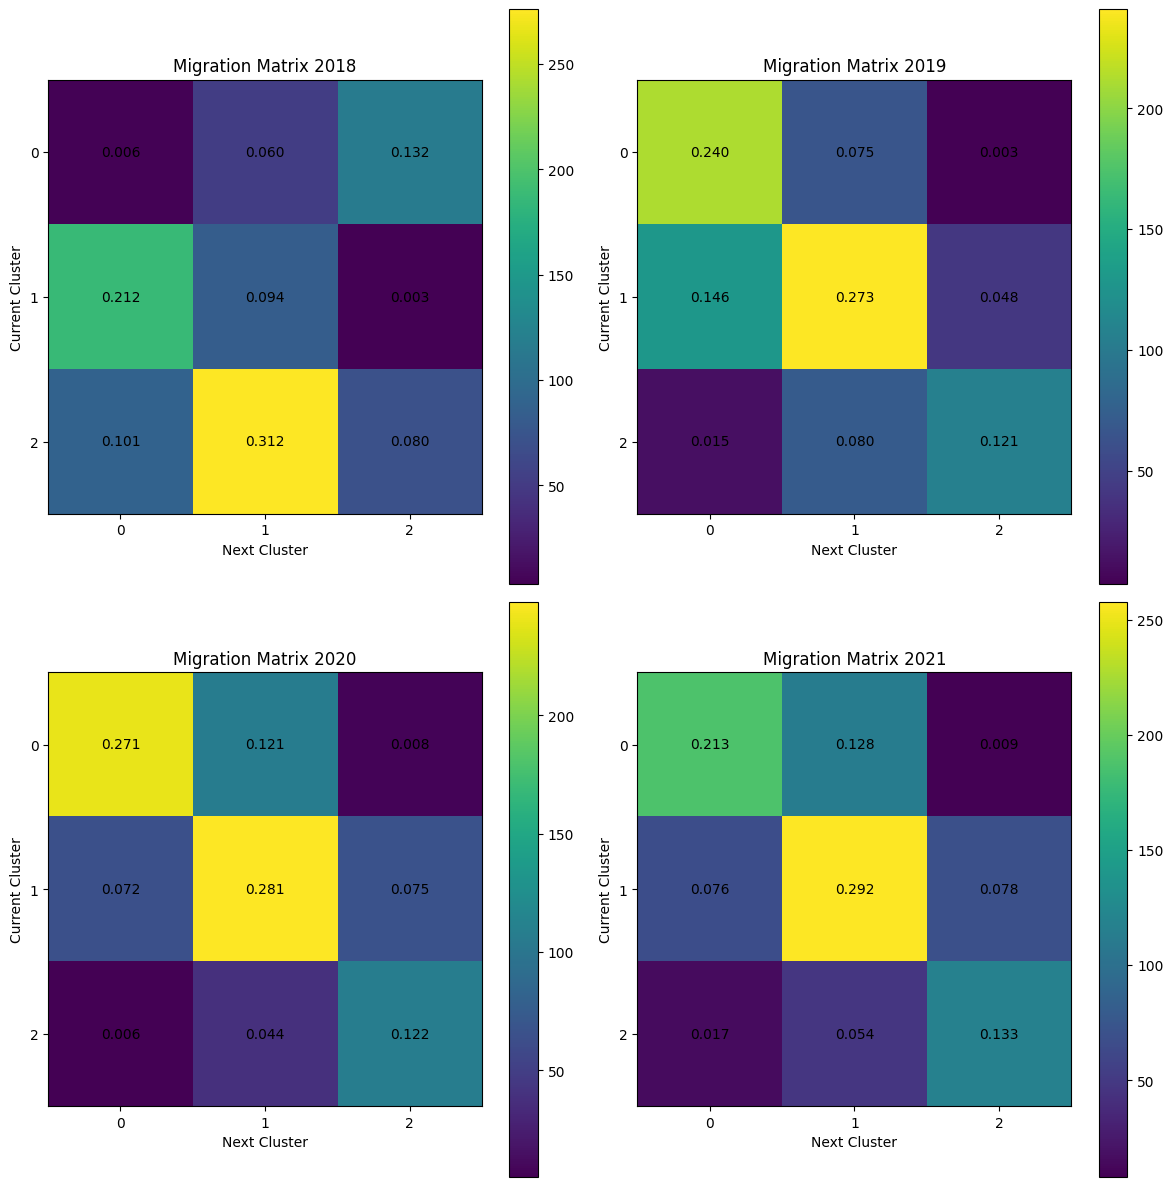

In [ ]:
plt.figure(figsize=(12, 12))
migration_matrices = []
migration_matrices = [migration_matrix18,migration_matrix19, migration_matrix20, migration_matrix21]

for i, matrix in enumerate(migration_matrices):
    plt.subplot(2, 2, i+1)
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.title(f'Migration Matrix {2018 + i}')
    plt.colorbar()
    plt.xlabel('Next Cluster')
    plt.ylabel('Current Cluster')
    plt.xticks(np.arange(3))
    plt.yticks(np.arange(3))

    for x in range(3):
        for y in range(3):
            plt.text(y, x,'{:.3f}'.format(matrix[x][y]/884), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

## Какой коэффициент ввносит наибольший вклад в переход между кластерами?

Для этого необоходимо посчитать корреляцию между переходами каждого типа и изменениями в значниях коэффициентов модели Альтмана.

Берем компанию, смотрим, куда перешла, записываем измменение каждого кожффициента, потомм считаем коррелчцию

In [ ]:
clustered_data

,result_2018,cluster_number2018,result_2019,cluster_number2019,result_2020,cluster_number2020,result_2021,cluster_number2021,result_2022,cluster_number2022
0,58.922429,0,47.685828,0,55.214886,1,55.904617,1,52.774879,1
1,44.614250,1,54.174316,1,64.024629,2,60.791539,2,50.768529,1
2,47.353019,1,49.195999,1,58.103880,1,68.484533,2,72.831946,2
3,53.220150,2,60.186697,2,48.937079,0,57.893316,1,55.177473,1
4,45.671297,1,46.195950,0,49.748755,0,49.863683,0,48.460330,0
...,...,...,...,...,...,...,...,...,...,...
879,63.797393,0,68.094486,2,70.055701,2,66.813643,2,58.328972,2
880,79.791288,0,69.625473,2,67.195448,2,67.461354,2,66.883204,2
881,53.624692,2,60.979591,2,63.425532,2,57.756966,1,61.630973,2
882,51.270749,2,46.680497,0,51.303424,1,47.475400,0,53.090284,1


In [ ]:
altman_components

,x1_2018,x2_2018,x3_2018,x4_2018,x5_2018,result_2018,x1_2019,x2_2019,x3_2019,x4_2019,...,x5_2021,result_2021,x1_2022,x2_2022,x3_2022,x4_2022,x5_2022,result_2022,index_column,cluster_number
0,0.133850,0.150271,0.123488,0.080846,31.083555,58.922429,0.027420,0.182458,0.021044,0.002824,...,12.000227,55.904617,0.059410,0.140509,0.054547,0.011106,11.813744,52.774879,13331,2
1,0.047290,0.414882,0.040481,0.000450,7.399180,44.614250,0.036657,0.107456,0.031845,0.016594,...,41.255275,60.791539,0.007835,0.244177,0.005419,0.026538,3.242441,50.768529,13949,2
2,0.024322,0.219454,0.010930,0.004107,2.935829,47.353019,0.019058,0.058766,0.013083,0.001621,...,17.954390,68.484533,0.064928,0.050712,0.051831,0.203902,11406.000000,72.831946,32834,1
3,0.036976,0.337814,0.023916,0.016923,18.616438,53.220150,0.139234,0.288295,0.107279,0.047946,...,26.881232,57.893316,0.144325,0.149579,0.105570,0.019036,18.229779,55.177473,37717,2
4,0.023767,0.327202,0.008214,0.004046,1.605941,45.671297,0.022891,0.306532,0.007622,0.005307,...,6.228365,49.863683,0.045723,0.284123,0.014409,0.016640,1.532235,48.460330,50821,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.367653,0.115660,0.284339,0.111694,78.290093,63.797393,0.540333,0.146351,0.425280,0.247475,...,231.262643,66.813643,0.376958,0.269683,0.291467,0.025774,29.578130,58.328972,160765,1
880,0.828813,0.737330,0.661423,0.224279,5077.734375,79.791288,0.560325,0.384241,0.444208,0.386879,...,320.935331,67.461354,0.314990,0.096536,0.294708,0.471787,100.631076,66.883204,160857,1
881,0.304150,0.263262,0.231879,0.006651,14.259309,53.624692,0.241896,0.180735,0.178173,0.372994,...,18.302898,57.756966,0.166632,0.105087,0.144167,0.261569,29.288004,61.630973,160876,1
882,0.149250,0.136189,0.074084,0.017812,2.697385,51.270749,0.098264,0.241705,0.044703,0.003287,...,2.276515,47.475400,0.179121,0.117589,0.103079,0.023426,4.185545,53.090284,160890,2


Занумеруем типы переходов:

- 0 - 0 = а
- 0 - 1 = b
- 0 - 2 = c
- 1 - 0 = d
- 1 - 1 = e
- 1 - 2 = f
- 2 - 0 = g
- 2 - 1 = h
- 2 - 2 = i

In [61]:
changes = pd.DataFrame()

def migration_type(row, year):
  cluster_prev = row.loc[f'cluster_number{year - 1}']
  cluster_cur = row.loc[f'cluster_number{year}']
  if cluster_prev == 0 and cluster_cur == 0:
    return 'a'
  elif cluster_prev == 0 and cluster_cur == 1:
    return 'b'
  elif cluster_prev == 0 and cluster_cur == 2:
    return 'c'
  elif cluster_prev == 1 and cluster_cur == 0:
    return 'd'
  elif cluster_prev == 1 and cluster_cur == 1:
    return 'e'
  elif cluster_prev == 1 and cluster_cur == 2:
    return 'f'
  elif cluster_prev == 2 and cluster_cur == 0:
    return 'g'
  elif cluster_prev == 2 and cluster_cur == 1:
    return 'h'
  elif cluster_prev == 2 and cluster_cur == 2:
    return 'i'


for year in range(2019, 2023):
    current_col = f'x1_{year}'
    prev_col = f'x1_{year-1}'
    changes[f'x1_change_{year}'] = altman_components[current_col] - altman_components[prev_col]

    current_col = f'x2_{year}'
    prev_col = f'x2_{year-1}'
    changes[f'x2_change_{year}'] = altman_components[current_col] - altman_components[prev_col]

    current_col = f'x3_{year}'
    prev_col = f'x3_{year-1}'
    changes[f'x3_change_{year}'] = altman_components[current_col] - altman_components[prev_col]

    current_col = f'x4_{year}'
    prev_col = f'x4_{year-1}'
    changes[f'x4_change_{year}'] = altman_components[current_col] - altman_components[prev_col]

    current_col = f'x5_{year}'
    prev_col = f'x5_{year-1}'
    changes[f'x5_change_{year}'] = altman_components[current_col] - altman_components[prev_col]

    changes[f'migration_{year}'] = clustered_data.apply(lambda row: migration_type(row, year), axis = 1)

changes

,x1_change_2019,x2_change_2019,x3_change_2019,x4_change_2019,x5_change_2019,migration_2019,x1_change_2020,x2_change_2020,x3_change_2020,x4_change_2020,...,x3_change_2021,x4_change_2021,x5_change_2021,migration_2021,x1_change_2022,x2_change_2022,x3_change_2022,x4_change_2022,x5_change_2022,migration_2022
0,-0.106431,0.032188,-0.102444,-0.078022,-26.774626,a,0.017016,-0.119973,0.012336,0.085182,...,0.013295,-0.037545,7.980833,e,0.008550,0.040703,0.007871,-0.039355,-0.186483,e
1,-0.010634,-0.307426,-0.008636,0.016144,8.282614,e,0.186547,0.012782,0.180119,0.159883,...,-0.136360,-0.043470,-69.760934,i,-0.069834,0.175372,-0.070186,-0.106469,-38.012834,h
2,-0.005264,-0.160688,0.002153,-0.002486,5.490703,e,0.170905,0.039820,0.123487,0.111383,...,0.399933,-0.002884,8.034820,f,-0.646818,0.038278,-0.484671,0.093781,11388.045610,i
3,0.102259,-0.049519,0.083364,0.031023,125.050228,i,-0.123154,-0.114067,-0.103173,-0.033457,...,0.279342,0.007309,25.052014,b,-0.179522,-0.032439,-0.177879,-0.002763,-8.651452,e
4,-0.000876,-0.020671,-0.000592,0.001261,-0.033783,d,0.001816,-0.016793,0.003589,0.021317,...,0.041541,-0.019943,4.203782,a,-0.019407,0.015683,-0.038343,0.009960,-4.696130,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.172681,0.030691,0.140941,0.135781,41.940814,c,0.036957,-0.030318,0.030819,-0.014289,...,-0.040284,-0.169636,7.139606,i,-0.142045,0.145785,-0.124348,-0.037776,-201.684513,i
880,-0.268488,-0.353089,-0.217215,0.162600,-4823.820025,c,-0.098805,-0.187055,-0.081224,0.040290,...,-0.056084,-0.232307,226.401885,i,-0.000030,-0.014222,-0.012193,0.276926,-220.304255,i
881,-0.062255,-0.082527,-0.053707,0.366343,1.235166,i,0.101812,-0.022894,0.087442,-0.029245,...,-0.173848,-0.248127,-12.696688,h,0.053737,-0.071015,0.052401,0.165947,10.985106,f
882,-0.050987,0.105516,-0.029381,-0.014524,-0.561148,g,0.080525,-0.144578,0.068439,0.002702,...,-0.092603,-0.000436,-3.008178,d,0.128858,-0.118820,0.082539,0.017872,1.909030,b


In [62]:
changes = pd.get_dummies(changes, columns=['migration_2019', 'migration_2020', 'migration_2021', 'migration_2022'])
changes

,x1_change_2019,x2_change_2019,x3_change_2019,x4_change_2019,x5_change_2019,x1_change_2020,x2_change_2020,x3_change_2020,x4_change_2020,x5_change_2020,...,migration_2021_i,migration_2022_a,migration_2022_b,migration_2022_c,migration_2022_d,migration_2022_e,migration_2022_f,migration_2022_g,migration_2022_h,migration_2022_i
0,-0.106431,0.032188,-0.102444,-0.078022,-26.774626,0.017016,-0.119973,0.012336,0.085182,-0.289534,...,False,False,False,False,False,True,False,False,False,False
1,-0.010634,-0.307426,-0.008636,0.016144,8.282614,0.186547,0.012782,0.180119,0.159883,95.334415,...,True,False,False,False,False,False,False,False,True,False
2,-0.005264,-0.160688,0.002153,-0.002486,5.490703,0.170905,0.039820,0.123487,0.111383,1.493039,...,False,False,False,False,False,False,False,False,False,True
3,0.102259,-0.049519,0.083364,0.031023,125.050228,-0.123154,-0.114067,-0.103173,-0.033457,-141.837449,...,False,False,False,False,False,True,False,False,False,False
4,-0.000876,-0.020671,-0.000592,0.001261,-0.033783,0.001816,-0.016793,0.003589,0.021317,0.452425,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.172681,0.030691,0.140941,0.135781,41.940814,0.036957,-0.030318,0.030819,-0.014289,103.892130,...,True,False,False,False,False,False,False,False,False,True
880,-0.268488,-0.353089,-0.217215,0.162600,-4823.820025,-0.098805,-0.187055,-0.081224,0.040290,-159.380904,...,True,False,False,False,False,False,False,False,False,True
881,-0.062255,-0.082527,-0.053707,0.366343,1.235166,0.101812,-0.022894,0.087442,-0.029245,15.505110,...,False,False,False,False,False,False,True,False,False,False
882,-0.050987,0.105516,-0.029381,-0.014524,-0.561148,0.080525,-0.144578,0.068439,0.002702,3.148457,...,False,False,True,False,False,False,False,False,False,False


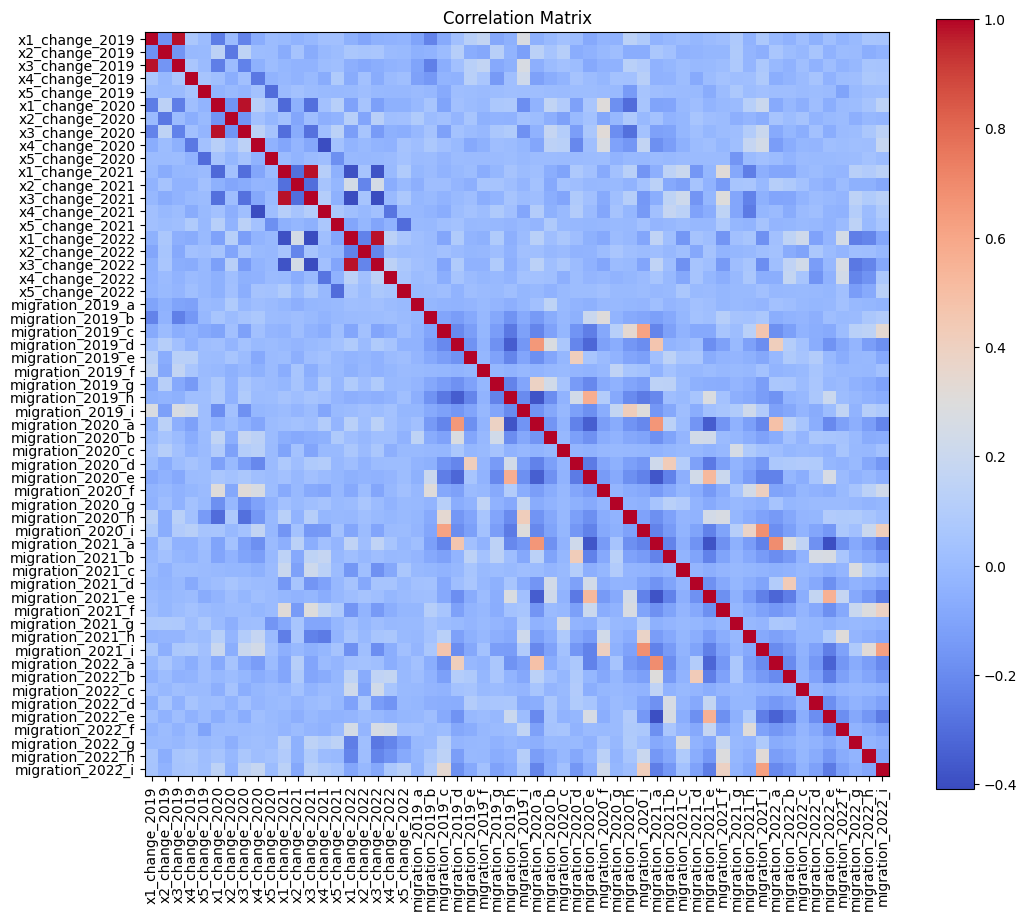

In [69]:
correlation_matrix_changes = changes.corr()

plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix_changes, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
column_names = changes.columns

# Подписываем оси названиями столбцов
plt.xticks(range(len(column_names)), column_names, rotation=90)
plt.yticks(range(len(column_names)), column_names)

plt.show()

In [ ]:
changes

,x1_change_2019,x2_change_2019,x3_change_2019,x4_change_2019,x5_change_2019,x1_change_2020,x2_change_2020,x3_change_2020,x4_change_2020,x5_change_2020,...,migration_2021_i,migration_2022_a,migration_2022_b,migration_2022_c,migration_2022_d,migration_2022_e,migration_2022_f,migration_2022_g,migration_2022_h,migration_2022_i
0,-0.106431,0.032188,-0.102444,-0.078022,-26.774626,0.017016,-0.119973,0.012336,0.085182,-0.289534,...,False,False,False,False,False,True,False,False,False,False
1,-0.010634,-0.307426,-0.008636,0.016144,8.282614,0.186547,0.012782,0.180119,0.159883,95.334415,...,True,False,False,False,False,False,False,False,True,False
2,-0.005264,-0.160688,0.002153,-0.002486,5.490703,0.170905,0.039820,0.123487,0.111383,1.493039,...,False,False,False,False,False,False,False,False,False,True
3,0.102259,-0.049519,0.083364,0.031023,125.050228,-0.123154,-0.114067,-0.103173,-0.033457,-141.837449,...,False,False,False,False,False,True,False,False,False,False
4,-0.000876,-0.020671,-0.000592,0.001261,-0.033783,0.001816,-0.016793,0.003589,0.021317,0.452425,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.172681,0.030691,0.140941,0.135781,41.940814,0.036957,-0.030318,0.030819,-0.014289,103.892130,...,True,False,False,False,False,False,False,False,False,True
880,-0.268488,-0.353089,-0.217215,0.162600,-4823.820025,-0.098805,-0.187055,-0.081224,0.040290,-159.380904,...,True,False,False,False,False,False,False,False,False,True
881,-0.062255,-0.082527,-0.053707,0.366343,1.235166,0.101812,-0.022894,0.087442,-0.029245,15.505110,...,False,False,False,False,False,False,True,False,False,False
882,-0.050987,0.105516,-0.029381,-0.014524,-0.561148,0.080525,-0.144578,0.068439,0.002702,3.148457,...,False,False,True,False,False,False,False,False,False,False


# Альтман по годам

In [ ]:
cluster_centers_years = [{}, {}, {}, {}, {}]
cluster_quantity_years = [{}, {}, {}, {}, {}]

In [ ]:
clustering_18 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(data_2018['result_2018'].values.reshape(-1, 1))
clustering_18.cluster_centers_

array([[52.61028917],
       [43.24638851],
       [63.02421565]])

In [ ]:
for i in range(3):
  cluster_centers_years[0][i] = clustering_18.cluster_centers_[i][0]


for i in range(3):
  cluster_quantity_years[0][i] = cluster_counts_18[i]

cluster_centers_years

[{0: 52.61028916606945, 1: 43.24638851233248, 2: 63.02421564906396},
 {0: 61.80979082111805, 1: 42.36245115455632, 2: 51.72133307217854},
 {0: 64.0704531025186, 1: 44.82621156054592, 2: 54.23672880058632},
 {0: 63.44707015439064, 1: 44.32535965082242, 2: 53.615305821090054},
 {0: 53.48712375313497, 1: 63.43844631983629, 2: 44.02972052874566}]

In [ ]:
data_2018['cluster_number'] = clustering_18.labels_
cluster_counts_18 = data_2018['cluster_number'].value_counts()
cluster_counts_18

cluster_number
0    804
1    541
2    351
Name: count, dtype: int64

In [ ]:
clustering_19 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(data_2019['result_2019'].values.reshape(-1, 1))
clustering_19.cluster_centers_

array([[61.80979082],
       [42.36245115],
       [51.72133307]])

In [ ]:
for i in range(3):
  cluster_centers_years[1][i] = clustering_19.cluster_centers_[i][0]


for i in range(3):
  cluster_quantity_years[1][i] = cluster_counts_19[i]

cluster_centers_years
cluster_quantity_years

[{0: 804, 1: 541, 2: 351}, {0: 496, 1: 515, 2: 858}, {}, {}, {}]

In [ ]:
data_2019['cluster_number'] = clustering_19.labels_
cluster_counts_19 = data_2019['cluster_number'].value_counts()
cluster_counts_19

cluster_number
2    858
1    515
0    496
Name: count, dtype: int64

In [ ]:
clustering_20 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(data_2020['result_2020'].values.reshape(-1, 1))
clustering_20.cluster_centers_

array([[64.0704531 ],
       [44.82621156],
       [54.2367288 ]])

In [ ]:
data_2020['cluster_number'] = clustering_20.labels_
cluster_counts_20 = data_2020['cluster_number'].value_counts()
cluster_counts_20

cluster_number
2    788
1    639
0    418
Name: count, dtype: int64

In [ ]:
for i in range(3):
  cluster_centers_years[2][i] = clustering_20.cluster_centers_[i][0]


for i in range(3):
  cluster_quantity_years[2][i] = cluster_counts_20[i]

cluster_centers_years

[{0: 52.61028916606945, 1: 43.24638851233248, 2: 63.02421564906396},
 {0: 61.80979082111805, 1: 42.36245115455632, 2: 51.72133307217854},
 {0: 64.0704531025186, 1: 44.82621156054592, 2: 54.23672880058632},
 {0: 63.44707015439064, 1: 44.32535965082242, 2: 53.615305821090054},
 {0: 53.48712375313497, 1: 63.43844631983629, 2: 44.02972052874566}]

In [ ]:
clustering_21 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(data_2021['result_2021'].values.reshape(-1, 1))
clustering_21.cluster_centers_

array([[63.44707015],
       [44.32535965],
       [53.61530582]])

In [ ]:
data_2021['cluster_number'] = clustering_21.labels_
cluster_counts_21 = data_2021['cluster_number'].value_counts()
cluster_counts_21

cluster_number
2    898
1    546
0    505
Name: count, dtype: int64

In [ ]:
for i in range(3):
  cluster_centers_years[3][i] = clustering_21.cluster_centers_[i][0]


for i in range(3):
  cluster_quantity_years[3][i] = cluster_counts_21[i]


cluster_centers_years

[{0: 52.61028916606945, 1: 43.24638851233248, 2: 63.02421564906396},
 {0: 61.80979082111805, 1: 42.36245115455632, 2: 51.72133307217854},
 {0: 64.0704531025186, 1: 44.82621156054592, 2: 54.23672880058632},
 {0: 63.44707015439064, 1: 44.32535965082242, 2: 53.615305821090054},
 {0: 53.48712375313497, 1: 63.43844631983629, 2: 44.02972052874566}]

In [ ]:
clustering_22 = KMeans(n_clusters=3, random_state=5, n_init="auto").fit(data_2022['result_2022'].values.reshape(-1, 1))
clustering_22.cluster_centers_

array([[53.48712375],
       [63.43844632],
       [44.02972053]])

In [ ]:
data_2022['cluster_number'] = clustering_22.labels_
cluster_counts_22 = data_2022['cluster_number'].value_counts()
cluster_counts_22

cluster_number
0    1080
2     601
1     595
Name: count, dtype: int64

In [ ]:
for i in range(3):
  cluster_centers_years[4][i] = clustering_22.cluster_centers_[i][0]


for i in range(3):
  cluster_quantity_years[4][i] = cluster_counts_22[i]


cluster_centers_years
cluster_quantity_years

[{0: 804, 1: 541, 2: 351},
 {0: 496, 1: 515, 2: 858},
 {0: 418, 1: 639, 2: 788},
 {0: 505, 1: 546, 2: 898},
 {0: 1080, 1: 595, 2: 601}]

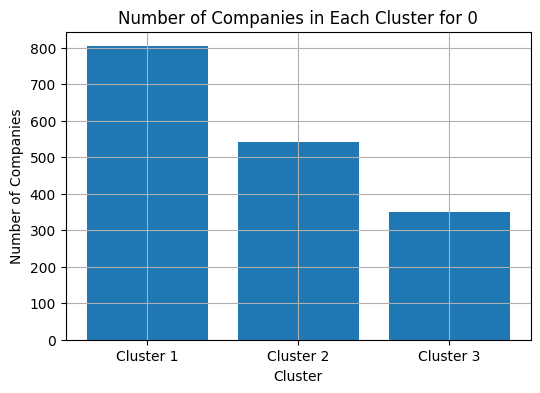

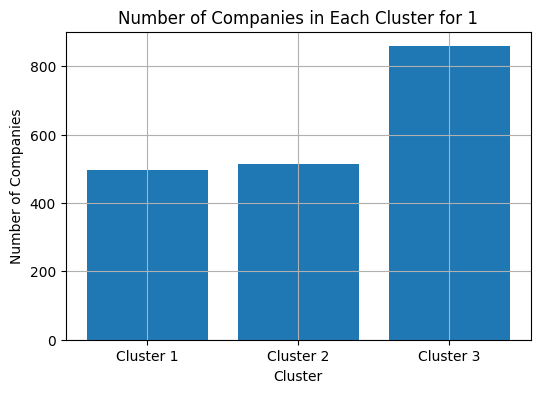

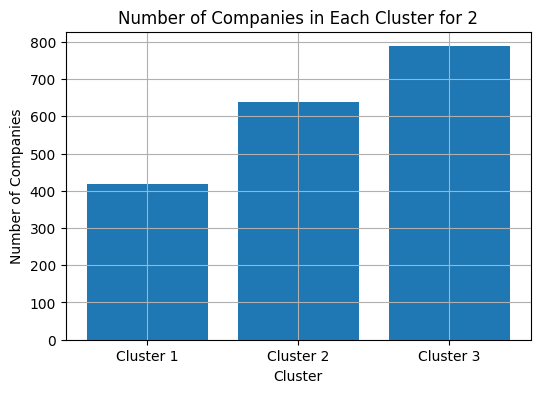

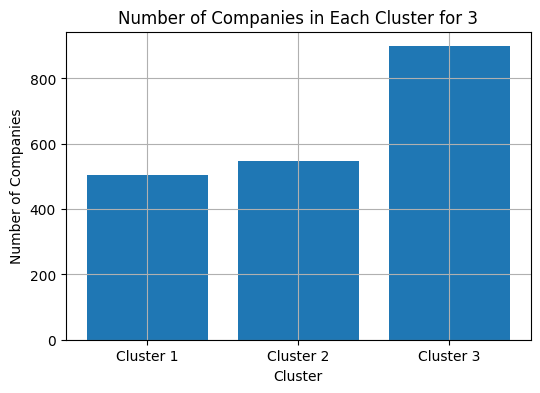

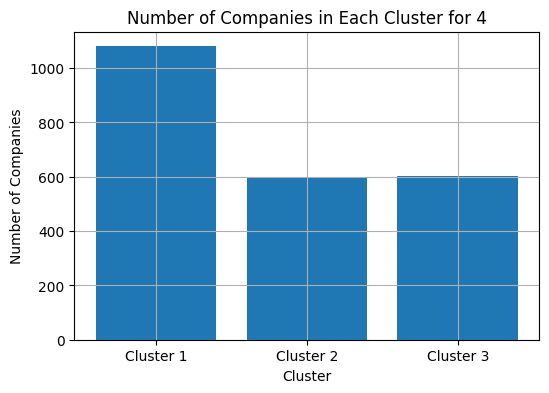

In [ ]:
for year in years:
    plt.figure(figsize=(6, 4))
    cluster_values = [cluster_quantity_years[year][i] for i in range(3)]
    plt.bar(range(1, 4), cluster_values)
    plt.xlabel('Cluster')
    plt.ylabel('Number of Companies')
    plt.title(f'Number of Companies in Each Cluster for {year}')
    plt.xticks(range(1, 4), [f'Cluster {i+1}' for i in range(3)])
    plt.grid(True)
    plt.show()